In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 91s 1us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

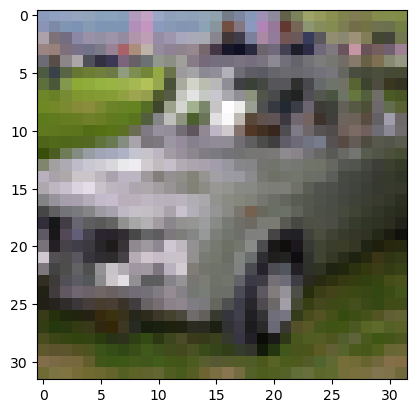

In [10]:
plt.imshow(x_train[44])

In [12]:
x_train=x_train/255

In [15]:
x_test=x_test/255

In [17]:
x_test.shape

(10000, 32, 32, 3)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

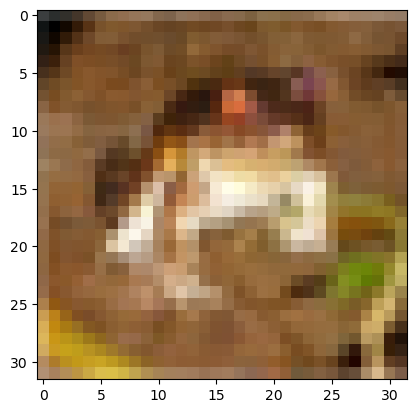

In [29]:
plt.imshow(x_train[0])

In [42]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [31]:
x_train.shape

(50000, 32, 32, 3)

In [34]:
model=Sequential()

#Convolutional Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
#Maxpool Layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_1 (Dense)             (None, 256)              

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [38]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 32s 19ms/step - loss: 1.4955 - accuracy: 0.4608 - val_loss: 1.2541 - val_accuracy: 0.5516
Epoch 2/15
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1785 - accuracy: 0.5822 - val_loss: 1.1536 - val_accuracy: 0.5867
Epoch 3/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0248 - accuracy: 0.6399 - val_loss: 1.0388 - val_accuracy: 0.6386
Epoch 4/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9113 - accuracy: 0.6836 - val_loss: 0.9694 - val_accuracy: 0.6619
Epoch 5/15
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8276 - accuracy: 0.7098 - val_loss: 1.0225 - val_accuracy: 0.6457
Epoch 6/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7527 - accuracy: 0.7375 - val_loss: 1.0419 - val_accuracy: 0.6584


In [39]:
metrics=pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.495464,0.46076,1.254095,0.5516
1,1.178454,0.58222,1.153649,0.5867
2,1.024773,0.63994,1.038841,0.6386
3,0.911269,0.68364,0.969419,0.6619
4,0.827599,0.70982,1.022524,0.6457


<Axes: >

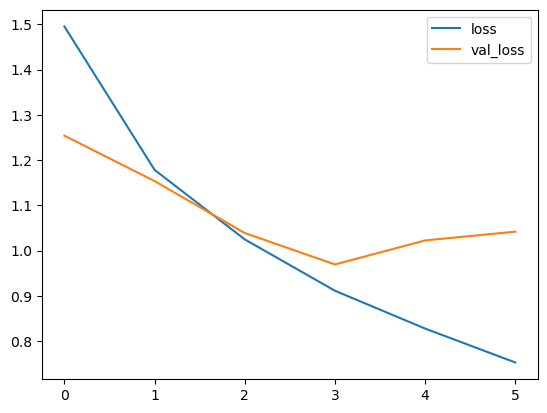

In [40]:
metrics[['loss','val_loss']].plot()

<Axes: >

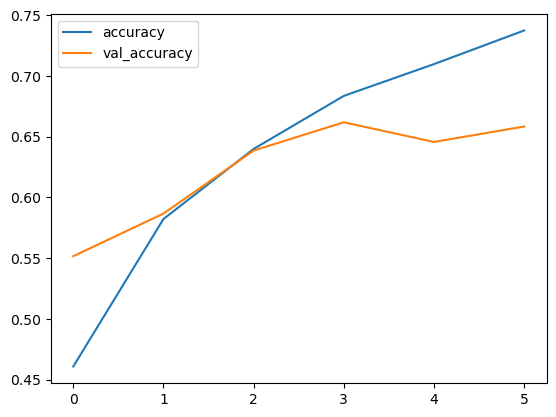

In [41]:
metrics[['accuracy','val_accuracy']].plot()

In [45]:

from sklearn.metrics import classification_report,confusion_matrix

In [46]:
y_prediction=np.argmax(model.predict(x_test),axis=-1)
y_prediction

313/313 [==============================] - 3s 8ms/step


array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [47]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [48]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.80      0.65      0.72      1000
           1       0.86      0.71      0.78      1000
           2       0.60      0.52      0.55      1000
           3       0.45      0.53      0.49      1000
           4       0.52      0.72      0.60      1000
           5       0.61      0.48      0.53      1000
           6       0.61      0.82      0.70      1000
           7       0.73      0.71      0.72      1000
           8       0.75      0.79      0.77      1000
           9       0.84      0.66      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.68      0.66      0.66     10000
weighted avg       0.68      0.66      0.66     10000



In [49]:
print(confusion_matrix(y_test,y_prediction))

[[650  14  76  29  35  10  34  18 106  28]
 [ 25 706  10  18  22  16  61   9  67  66]
 [ 41   2 515  86 165  60  99  20  11   1]
 [  6   3  54 534 123 110 120  37  10   3]
 [  8   0  47  59 716  17  65  74  14   0]
 [  5   1  50 249  91 478  54  65   6   1]
 [  0   0  27  62  73  10 821   5   1   1]
 [  6   0  32  49 108  63  21 712   5   4]
 [ 51  19  30  30  20   7  26   8 788  21]
 [ 21  75  19  68  16  16  42  34  45 664]]


In [50]:
import seaborn as sns

<Axes: >

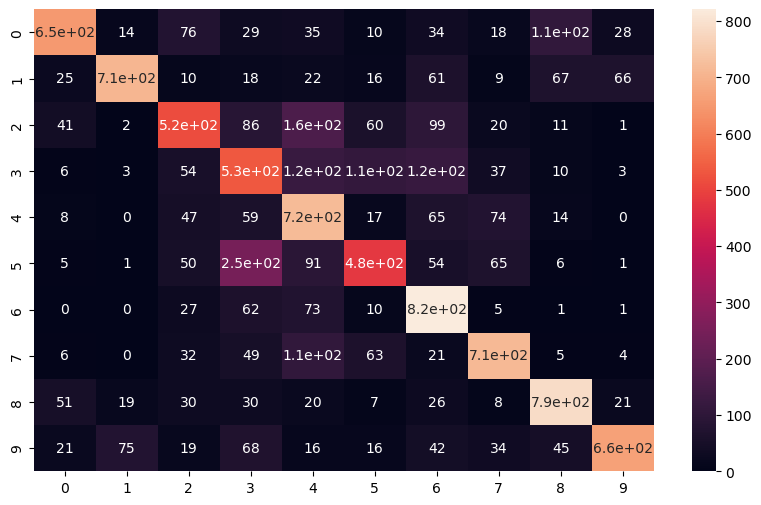

In [52]:
plt.figure(figsize=(10,6))

sns.heatmap(confusion_matrix(y_test,y_prediction),annot=True)

In [57]:
# Predict the single image value

single=x_test[1]

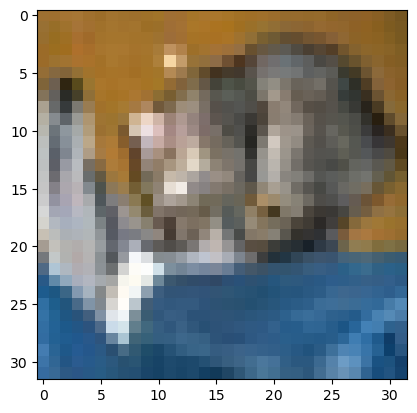

In [58]:
plt.imshow(single)

In [61]:
single.shape

(32, 32, 3)

In [62]:
single_prediction=np.argmax(model.predict(single.reshape(1,32,32,3)),axis=1)
single_prediction

1/1 [==============================] - 0s 33ms/step


array([3], dtype=int64)

In [64]:
y_test[0]

array([3], dtype=uint8)

# yeah its prediction exactly the same values so its working perfectly DONE :)